# Gaussian Processes with sklearn


In [95]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel as C, RBF, Matern, WhiteKernel
from sklearn.gaussian_process.kernels import StationaryKernelMixin, NormalizedKernelMixin, Kernel

from scipy.special import erf

In [8]:
data = pd.read_csv("../data/us/covid/nyt_us_counties_daily.csv")

In [9]:
la = data.loc[data["fips"] == 6037]

days_elapsed = []
deaths = []
c_deaths = []
death_count = 0

counter = 0
for i, row in la.iterrows():
    death_count += int(row["deaths"])
    days_elapsed.append(counter)
    deaths.append(int(row["deaths"]))
    c_deaths.append(death_count)
    counter += 1
    
d_deaths = pd.DataFrame(data={"days_elapsed": days_elapsed, "deaths": deaths})
c_deaths = pd.DataFrame(data={"days_elapsed": days_elapsed, "deaths": c_deaths})

## Custom erf Kernel

In [96]:
def erf_curve(times, log_max, slope, center):
    max_val = 10 ** log_max
    deaths = max_val * (1 + erf(slope * (times - center)))
    return deaths

class ERF(StationaryKernelMixin, NormalizedKernelMixin, Kernel):
    def __init__(log_max=3.0, slope=1.0, center=100.0):
        self.log_max = log_max
        self.slope = slope
        self.center = center
        
    def __call__(self, X, Y=None, eval_gradient=False):
        

In [98]:
X = d_deaths["days_elapsed"].values.reshape(-1, 1)
y = d_deaths["deaths"].values.reshape(-1, 1)
x = np.atleast_2d(np.linspace(0, 121, 122)).T

In [121]:
kernel = RBF(length_scale=10) + WhiteKernel(noise_level=1)


In [122]:
gp = GaussianProcessRegressor(kernel=kernel)

In [123]:
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RBF(length_scale=10) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [124]:
y_pred, sigma = gp.predict(x, return_std=True)

(-1, 75)

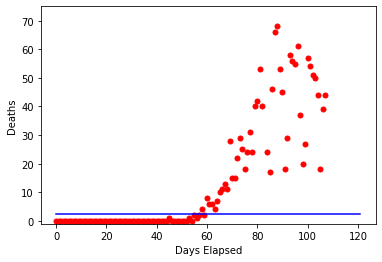

In [125]:
plt.figure()
plt.plot(X, y, 'r.', markersize=10, label='Actual')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.xlabel('Days Elapsed')
plt.ylabel('Deaths')
plt.ylim(-1, 75)

In [97]:
help(erf)

Help on ufunc object:

erf = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array o